In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [3]:
def read_file(file_name):
    #return pd.read_csv(file_name)
    # для заархивированных файлов
    return pd.read_csv(file_name, compression='gzip')

In [4]:
file_name = "Data/[4]vacancies.csv.gz"
read_file(file_name)

,id,description,key_skills,schedule_id,schedule_name,accept_handicapped,accept_kids,experience_id,experience_name,specializations,contacts,billing_type_id,billing_type_name,allow_messages,premium,driver_license_types,accept_incomplete_resumes,employer_id,employer_name,employer_vacancies_url,employer_trusted,employer_alternate_url,employer_industries,response_letter_required,type_id,type_name,has_test,response_url,test_required,salary_from,salary_to,salary_gross,salary_currency,archived,name,insider_interview,area_id,area_name,area_url,created_at,published_at,address_city,address_street,address_building,address_description,address_lat,address_lng,alternate_url,apply_alternate_url,code,department_id,department_name,employment_id,employment_name,prof_classes_found,terms_found
0,30711158,<p><strong>О Компании</strong></p> <p>Мы помог...,NaN,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,1.117 Тестирование 1 Информационные технологии...,NaN,standard,Стандарт,True,False,NaN,False,3034828.0,Смарт консалтинг,https://api.hh.ru/vacancies?employer_id=3034828,True,https://hh.ru/employer/3034828,Разработка программного обеспечения,False,open,Открытая,False,NaN,NaN,NaN,NaN,NaN,NaN,False,Тестировщик QA,NaN,4,Новосибирск,https://api.hh.ru/areas/4,2020-10-12T05:18:46+0300,2020-10-12T05:18:46+0300,Новосибирск,Октябрьская магистраль,4,NaN,55.022567,82.930086,https://hh.ru/vacancy/30711158,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,tester,jmeter спринт тестировщик continuous_integrati...
1,30711538,<p><strong>Vigrom</strong> сегодня – междунаро...,PHP\nSQL\nООП\nPostgreSQL\nMemcached\nSymfony\...,fullDay,Полный день,False,False,between1And3,От 1 года до 3 лет,"1.221 Программирование, Разработка 1 Информаци...",NaN,standard,Стандарт,True,False,NaN,False,1110684.0,Vigrom Corp.,https://api.hh.ru/vacancies?employer_id=1110684,True,https://hh.ru/employer/1110684,"Интернет-компания (поисковики, платежные систе...",False,open,Открытая,False,NaN,NaN,NaN,NaN,NaN,NaN,True,PHP-разработчик,NaN,71,Пенза,https://api.hh.ru/areas/71,2020-01-28T10:52:44+0300,2020-01-28T10:52:44+0300,Пенза,Тамбовская улица,35Б,NaN,53.173614,45.005847,https://hh.ru/vacancy/30711538,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,programmer,современный_офис memcache team phpunit php арх...
2,30713109,<p>Каждый день миллионы пользователей находят ...,NaN,remote,Удаленная работа,True,False,noExperience,Нет опыта,4.278 Сотрудник call-центра 4 Административный...,NaN,standard,Стандарт,False,False,NaN,True,1740.0,Яндекс,https://api.hh.ru/vacancies?employer_id=1740,True,https://hh.ru/employer/1740,"Интернет-компания (поисковики, платежные систе...",False,open,Открытая,False,NaN,NaN,NaN,NaN,NaN,NaN,True,Оператор саll-центра,NaN,2,Санкт-Петербург,https://api.hh.ru/areas/2,2020-03-21T10:07:10+0300,2020-03-21T10:07:10+0300,NaN,NaN,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/30713109,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,part,Частичная занятость,operator,яндекс windows_7 гибкий_график
3,30714567,<p><strong>В твоих руках - отличная возможност...,NaN,fullDay,Полный день,False,False,noExperience,Нет опыта,"17.269 Телекоммуникации, Сетевые решения 17 Пр...",NaN,standard,Стандарт,True,False,NaN,False,1217313.0,МегаФон Ритейл,https://api.hh.ru/vacancies?employer_id=1217313,True,https://hh.ru/employer/1217313,Розничная сеть (мобильный ретейл),False,open,Открытая,False,NaN,NaN,23000.0,29000.0,False,RUR,True,Продавец - Консультант офиса продаж и обслужив...,NaN,1395,Копейск,https://api.hh.ru/areas/1395,2020-01-13T12:38:10+0300,2020-01-13T12:38:10+0300,Челябинск,улица Кирова,159,NaN,55.164515,61.401188,https://hh.ru/vacancy/30714567,https://hh.ru/applicant/vacancy_response?vacan...,NaN,NaN,NaN,full,Полная занятость,prodajnik,медицинская_страховка официальное_трудоустройс...
4,30716168,<p><strong>Компания «Северсталь-Инфоком» - цен...,Bash\nPowerShell\nC++\nC#\nJava\nPerl\nPython\...,fullDay,По

In [5]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [6]:
file_name = "Data/[4]vacancies.csv.gz"
dataset = read_file(file_name)
output_file = "результаты_4.json"
get_memory_stat_by_column(dataset, output_file)

In [7]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [8]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [9]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj 

In [10]:
converted_obj = opt_obj(dataset)

6358.02 MB
4579.47 MB


In [11]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [12]:
converted_int = opt_int(dataset)

8.97 MB
3.36 MB
        before   after
id       int64  uint32
area_id  int64  uint16


In [13]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [14]:
converted_float = opt_float(dataset)

26.90 MB
13.45 MB
                      before    after
employer_id          float64  float32
salary_from          float64  float32
salary_to            float64  float32
address_description  float64  float32
address_lat          float64  float32
address_lng          float64  float32


In [15]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

6398.37 MB
4600.76 MB


In [16]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [17]:
need_column = dict()
column_names = ["id", "salary_from", "salary_to", "address_description",
                "address_lat", "address_lng", "description", "schedule_name", "experience_name", "billing_type_name"]

opt_dtypes = optimized_dataset.dtypes

for key in column_names:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_4.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
has_header = True
for chunk in pd.read_csv(file_name,
                         usecols=lambda x: x in column_names,
                         dtype=need_column,
                         #parse_dates=['date'],
                         #infer_datetime_format=True,
                         chunksize=100_000):
    # любые преобразования
    print(mem_usage(chunk))
    chunk.to_csv('df_4.csv', mode='a', header=has_header)
    has_header = False

id:uint32
salary_from:float32
salary_to:float32
address_description:float32
address_lat:float32
address_lng:float32
description:object
schedule_name:category
experience_name:category
billing_type_name:category
375.38 MB
374.23 MB
374.44 MB
372.92 MB
373.29 MB
327.90 MB


In [18]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        else:
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_4.json")

dataset = pd.read_csv("df_4.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column)
                  #parse_dates=['date'])
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587637 entries, 0 to 587636
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   587637 non-null  uint32  
 1   description          587637 non-null  object  
 2   schedule_name        587637 non-null  category
 3   experience_name      587637 non-null  category
 4   billing_type_name    587637 non-null  category
 5   salary_from          258741 non-null  float32 
 6   salary_to            164509 non-null  float32 
 7   address_description  0 non-null       float32 
 8   address_lat          278728 non-null  float32 
 9   address_lng          278728 non-null  float32 
dtypes: category(3), float32(5), object(1), uint32(1)
memory usage: 2.1 GB


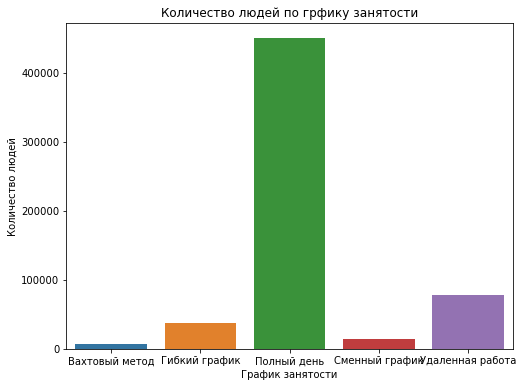

In [21]:
# График столбчатой диаграммы
plt.figure(figsize=(8, 6))
sns.countplot(x='schedule_name', data=dataset)
plt.xlabel('График занятости')
plt.ylabel('Количество людей')
plt.title('Количество людей по грфику занятости')
plt.show()

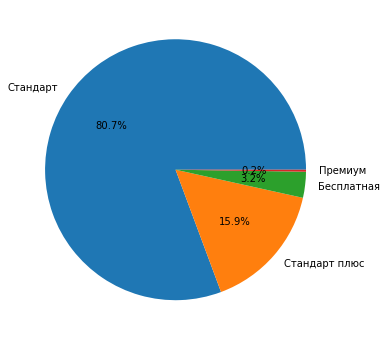

In [22]:
# График круговой диаграммы
plt.figure(figsize=(8, 6))
dataset['billing_type_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('')
plt.show()

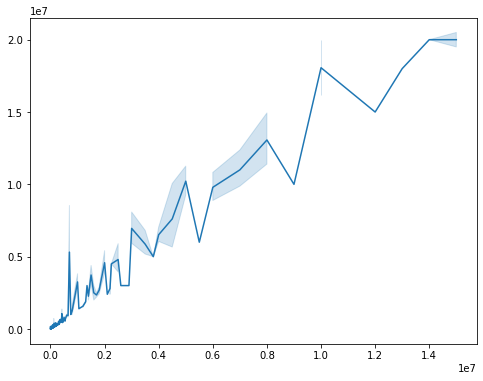

In [24]:
# Линейный график
plt.figure(figsize=(8, 6))
sns.lineplot(x='salary_from', y='salary_to', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

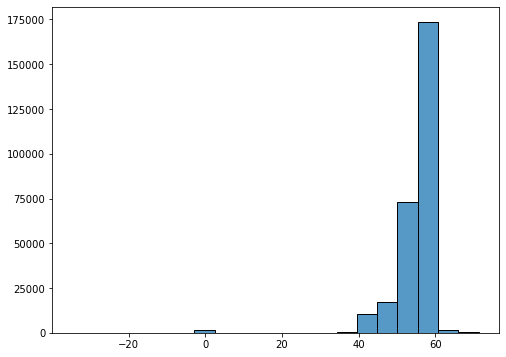

In [26]:
# Гистограмма для распределения продолжительности запланированного времени
plt.figure(figsize=(8, 6))
sns.histplot(dataset['address_lat'], bins=20)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

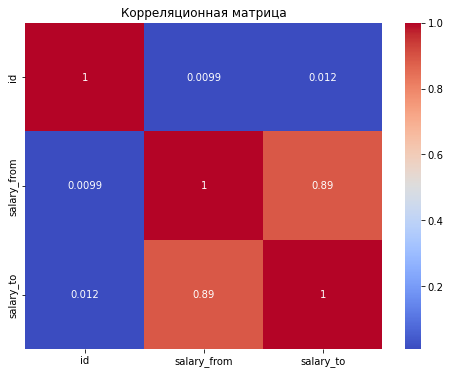

In [27]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['id', 'salary_from', 'salary_to']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()